# 1.package lda
关于使用lda这个包训练lda主题模型，http://chrisstrelioff.ws/sandbox/2014/11/13/getting_started_with_latent_dirichlet_allocation_in_python.html
这个链接中的文章写的非常清楚了，下面的代码及说明基本是来自于这个链接中的说明和官方文档。

也部分参考了这个链接
https://blog.csdn.net/Eastmount/article/details/50824215

In [1]:
import numpy as np
import lda

## 1.1 载入数据
X是训练集，395个documents，4258个words，组成了vocabulary。其中每个元素代表的都是词频。

In [2]:
X = lda.datasets.load_reuters()
vocab = lda.datasets.load_reuters_vocab()
titles = lda.datasets.load_reuters_titles()
X.shape

(395, 4258)

In [19]:
len(vocab)

4258

In [20]:
len(titles)

395

In [9]:
X

array([[1, 0, 1, ..., 0, 0, 0],
       [7, 0, 2, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 0, 1, ..., 0, 0, 0],
       [1, 0, 1, ..., 0, 0, 0],
       [1, 0, 1, ..., 0, 0, 0]], dtype=int32)

In [8]:
vocab[0:10]

('church',
 'pope',
 'years',
 'people',
 'mother',
 'last',
 'told',
 'first',
 'world',
 'year')

In [10]:
titles

('0 UK: Prince Charles spearheads British royal revolution. LONDON 1996-08-20',
 '1 GERMANY: Historic Dresden church rising from WW2 ashes. DRESDEN, Germany 1996-08-21',
 "2 INDIA: Mother Teresa's condition said still unstable. CALCUTTA 1996-08-23",
 '3 UK: Palace warns British weekly over Charles pictures. LONDON 1996-08-25',
 '4 INDIA: Mother Teresa, slightly stronger, blesses nuns. CALCUTTA 1996-08-25',
 "5 INDIA: Mother Teresa's condition unchanged, thousands pray. CALCUTTA 1996-08-25",
 '6 INDIA: Mother Teresa shows signs of strength, blesses nuns. CALCUTTA 1996-08-26',
 "7 INDIA: Mother Teresa's condition improves, many pray. CALCUTTA, India 1996-08-25",
 '8 INDIA: Mother Teresa improves, nuns pray for "miracle". CALCUTTA 1996-08-26',
 '9 UK: Charles under fire over prospect of Queen Camilla. LONDON 1996-08-26',
 '10 UK: Britain tells Charles to forget Camilla. LONDON 1996-08-27',
 "11 COTE D'IVOIRE: FEATURE - Quiet homecoming for reprieved Ivory Coast maid. ABIDJAN 1996-08-28",


## 1.2 训练LDA模型

In [11]:
model = lda.LDA(n_topics=20, n_iter=1500, random_state=1)

In [12]:
model.fit(X)  # model.fit_transform(X) is also available

INFO:lda:n_documents: 395
INFO:lda:vocab_size: 4258
INFO:lda:n_words: 84010
INFO:lda:n_topics: 20
INFO:lda:n_iter: 1500
INFO:lda:<0> log likelihood: -1051748
INFO:lda:<10> log likelihood: -719800
INFO:lda:<20> log likelihood: -699115
INFO:lda:<30> log likelihood: -689370
INFO:lda:<40> log likelihood: -684918
INFO:lda:<50> log likelihood: -681322
INFO:lda:<60> log likelihood: -678979
INFO:lda:<70> log likelihood: -676598
INFO:lda:<80> log likelihood: -675383
INFO:lda:<90> log likelihood: -673316
INFO:lda:<100> log likelihood: -672761
INFO:lda:<110> log likelihood: -671320
INFO:lda:<120> log likelihood: -669744
INFO:lda:<130> log likelihood: -669292
INFO:lda:<140> log likelihood: -667940
INFO:lda:<150> log likelihood: -668038
INFO:lda:<160> log likelihood: -667429
INFO:lda:<170> log likelihood: -666475
INFO:lda:<180> log likelihood: -665562
INFO:lda:<190> log likelihood: -664920
INFO:lda:<200> log likelihood: -664979
INFO:lda:<210> log likelihood: -664722
INFO:lda:<220> log likelihood: -

## 1.3 结果解读

topic_word的每一行是一个topic，因此共有20行，每一列是一个word，因此共有4258列。第m行,n列的元素的含义是这个word属于这个topic的概率是多少，因此每一列的和都是1，每个word属于各个topic的概率之和是1.

In [17]:
topic_word = model.topic_word_  # model.components_ also works
topic_word

array([[3.62505347e-06, 3.62505347e-06, 3.62505347e-06, ...,
        3.62505347e-06, 3.62505347e-06, 3.62505347e-06],
       [1.87498968e-02, 1.17916463e-06, 1.17916463e-06, ...,
        1.17916463e-06, 1.17916463e-06, 1.17916463e-06],
       [1.52206232e-03, 5.05668544e-06, 4.05040504e-03, ...,
        5.05668544e-06, 5.05668544e-06, 5.05668544e-06],
       ...,
       [4.17266923e-02, 3.93610908e-06, 9.05698699e-03, ...,
        3.93610908e-06, 3.93610908e-06, 3.93610908e-06],
       [2.37609835e-06, 2.37609835e-06, 2.37609835e-06, ...,
        2.37609835e-06, 2.37609835e-06, 2.37609835e-06],
       [3.46310752e-06, 3.46310752e-06, 3.46310752e-06, ...,
        3.46310752e-06, 3.46310752e-06, 3.46310752e-06]])

In [23]:
topic_word.shape

(20, 4258)

## 1.4 20个topic中概率前7的word展示
下面这部分代码是计算每个主题中的前7个单词

In [18]:
n_top_words = 8
for i, topic_dist in enumerate(topic_word):
    topic_words = np.array(vocab)[np.argsort(topic_dist)][:-n_top_words:-1]
    print('Topic {}: {}'.format(i, ' '.join(topic_words)))

Topic 0: british churchill sale million major letters west
Topic 1: church government political country state people party
Topic 2: elvis king fans presley life concert young
Topic 3: yeltsin russian russia president kremlin moscow michael
Topic 4: pope vatican paul john surgery hospital pontiff
Topic 5: family funeral police miami versace cunanan city
Topic 6: simpson former years court president wife south
Topic 7: order mother successor election nuns church nirmala
Topic 8: charles prince diana royal king queen parker
Topic 9: film french france against bardot paris poster
Topic 10: germany german war nazi letter christian book
Topic 11: east peace prize award timor quebec belo
Topic 12: n't life show told very love television
Topic 13: years year time last church world people
Topic 14: mother teresa heart calcutta charity nun hospital
Topic 15: city salonika capital buddhist cultural vietnam byzantine
Topic 16: music tour opera singer israel people film
Topic 17: church catholic be

## 1.5 输出前10个文档所属的topic

In [26]:
doc_topic = model.doc_topic_
print("type(doc_topic): {}".format(type(doc_topic)))
print("shape: {}".format(doc_topic.shape))
for n in range(10):
    topic_most_pr = doc_topic[n].argmax()
    print("doc: {} topic: {}".format(n, topic_most_pr))

type(doc_topic): <class 'numpy.ndarray'>
shape: (395, 20)
doc: 0 topic: 8
doc: 1 topic: 13
doc: 2 topic: 14
doc: 3 topic: 8
doc: 4 topic: 14
doc: 5 topic: 14
doc: 6 topic: 14
doc: 7 topic: 14
doc: 8 topic: 14
doc: 9 topic: 8


也可以使用下面的代码实现这个目标，Using the title of the new stories, we can sample the most probable topic。doc_topic这个矩阵是395行，20列，每一行是一个document，每一列是一个topic。Looking at the size of the output we can see that there is a distribution over the 20 topics for each of the 395 documents. These should be normalized for each document, let’s test the first 5，发现前5行，每一行相加都是1.说明第m行，第n列的元素的含义是第m个document属于第n个topic的概率是多少。

In [29]:
doc_topic = model.doc_topic_
print("type(doc_topic): {}".format(type(doc_topic)))
print("shape: {}".format(doc_topic.shape))

type(doc_topic): <class 'numpy.ndarray'>
shape: (395, 20)


In [30]:
for n in range(5):
    sum_pr = sum(doc_topic[n,:])
    print("document: {} sum: {}".format(n, sum_pr))

document: 0 sum: 1.0
document: 1 sum: 1.0
document: 2 sum: 1.0000000000000002
document: 3 sum: 1.0000000000000002
document: 4 sum: 0.9999999999999997


In [31]:
for n in range(10):
    topic_most_pr = doc_topic[n].argmax()
    print("doc: {} topic: {}\n{}...".format(n,
                                            topic_most_pr,
                                            titles[n][:50]))

doc: 0 topic: 8
0 UK: Prince Charles spearheads British royal revo...
doc: 1 topic: 13
1 GERMANY: Historic Dresden church rising from WW2...
doc: 2 topic: 14
2 INDIA: Mother Teresa's condition said still unst...
doc: 3 topic: 8
3 UK: Palace warns British weekly over Charles pic...
doc: 4 topic: 14
4 INDIA: Mother Teresa, slightly stronger, blesses...
doc: 5 topic: 14
5 INDIA: Mother Teresa's condition unchanged, thou...
doc: 6 topic: 14
6 INDIA: Mother Teresa shows signs of strength, bl...
doc: 7 topic: 14
7 INDIA: Mother Teresa's condition improves, many ...
doc: 8 topic: 14
8 INDIA: Mother Teresa improves, nuns pray for "mi...
doc: 9 topic: 8
9 UK: Charles under fire over prospect of Queen Ca...


## 1.6 输出指定文档所属各个topic的概率

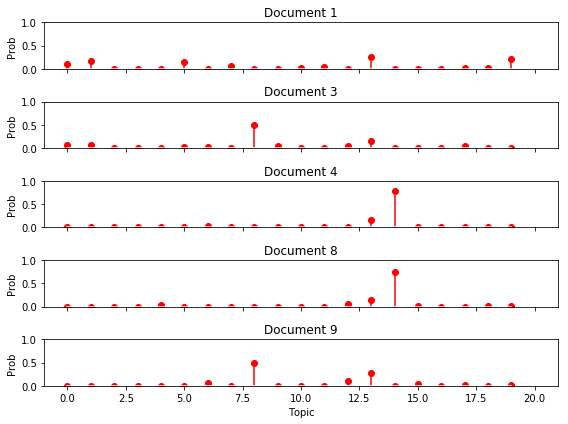

In [28]:
import matplotlib.pyplot as plt
f, ax= plt.subplots(5, 1, figsize=(8, 6), sharex=True)
for i, k in enumerate([1, 3, 4, 8, 9]):
    ax[i].stem(doc_topic[k,:], linefmt='r-',
               markerfmt='ro', basefmt='w-')
    ax[i].set_xlim(-1, 21)
    ax[i].set_ylim(0, 1)
    ax[i].set_ylabel("Prob")
    ax[i].set_title("Document {}".format(k))
 
ax[4].set_xlabel("Topic")
 
plt.tight_layout()
plt.show()

这个包似乎不能进行预测、推断，只能对所有的数据都进行训练，然后对训练集进行主题划分。

# 2.package gensim实现lda model

下面的代码内容主要来自于
https://www.pianshen.com/article/636768367/
和官方文档：
https://radimrehurek.com/gensim/models/ldamodel.html

## 2.1 准备数据并分词
准备原始数据，并将各个句子进行分词，得到一个二维矩阵。

In [1]:
from gensim import corpora, models
import jieba.posseg as jp, jieba
# 文本集
texts = [
    '美国教练坦言，没输给中国女排，是输给了郎平',
    '美国无缘四强，听听主教练的评价',
    '中国女排晋级世锦赛四强，全面解析主教练郎平的执教艺术',
    '为什么越来越多的人买MPV，而放弃SUV？跑一趟长途就知道了',
    '跑了长途才知道，SUV和轿车之间的差距',
    '家用的轿车买什么好']
jieba.add_word('四强', 9, 'n')
flags = ('n', 'nr', 'ns', 'nt', 'eng', 'v', 'd')  # 词性
stopwords = ('没', '就', '知道', '是', '才', '听听', '坦言', '全面', '越来越', '评价', '放弃', '人') 
words_ls = []
for text in texts:
    words = [word.word for word in jp.cut(text) if word.flag in flags and word.word not in stopwords]
    words_ls.append(words)
print(words_ls)

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\ADMINI~1\AppData\Local\Temp\jieba.cache
Loading model cost 0.831 seconds.
Prefix dict has been built successfully.


[['美国', '输给', '中国女排', '输给', '郎平'], ['美国', '无缘', '四强', '主教练'], ['中国女排', '晋级', '世锦赛', '四强', '主教练', '郎平', '执教', '艺术'], ['买', 'MPV', 'SUV', '跑', '长途'], ['跑', '长途', 'SUV', '轿车', '差距'], ['家用', '轿车', '买']]


## 2.2 将数据整理成lda模型所需要的输入的格式

In [2]:
#去重，存到字典里
dictionary = corpora.Dictionary(words_ls)  # 存到字典的过程其实就是得到了一个vocabulary，并给每个word打上了标签。
print(dictionary)
corpus = [dictionary.doc2bow(words) for words in words_ls] # 建立语料库，也就是说建立一个稀疏向量。使用“词ID：词频”的形式形成稀疏向量。
print(corpus)

Dictionary(19 unique tokens: ['中国女排', '美国', '输给', '郎平', '主教练']...)
[[(0, 1), (1, 1), (2, 2), (3, 1)], [(1, 1), (4, 1), (5, 1), (6, 1)], [(0, 1), (3, 1), (4, 1), (5, 1), (7, 1), (8, 1), (9, 1), (10, 1)], [(11, 1), (12, 1), (13, 1), (14, 1), (15, 1)], [(12, 1), (14, 1), (15, 1), (16, 1), (17, 1)], [(13, 1), (17, 1), (18, 1)]]


## 2.3训练lda模型

In [7]:
lda = models.ldamodel.LdaModel(corpus=corpus, id2word=dictionary, num_topics=2)
print(lda)

LdaModel(num_terms=19, num_topics=2, decay=0.5, chunksize=2000)


## 2.4 对训练集进行主题的判断

In [6]:
topics = lda.print_topics
print(topics)

<bound method BaseTopicModel.print_topics of <gensim.models.ldamodel.LdaModel object at 0x000000178AA7A3C8>>


In [9]:
for topic in lda.print_topics(num_words=5):
    print(topic)

(0, '0.087*"四强" + 0.085*"主教练" + 0.070*"郎平" + 0.067*"美国" + 0.063*"中国女排"')
(1, '0.091*"买" + 0.081*"长途" + 0.076*"跑" + 0.076*"轿车" + 0.071*"输给"')


In [12]:
resu = lda.inference(corpus)
resu

(array([[2.9038672 , 3.0961177 ],
        [4.4168324 , 0.58315706],
        [8.405289  , 0.5946879 ],
        [0.5925695 , 5.407418  ],
        [0.6734817 , 5.3265033 ],
        [0.5569761 , 3.443016  ]], dtype=float32), None)

## 2.5 对测试集做推断

In [14]:
# 主题推断
# print(lda.inference(corpus))
text5 = '中国女排将在郎平的率领下向世界女排三大赛的三连冠发起冲击'
bow = dictionary.doc2bow([word.word for word in jp.cut(text5) if word.flag in flags and word.word not in stopwords])
ndarray = lda.inference([bow])[0]
print(text5)
for e, value in enumerate(ndarray[0]):
    print('\t主题%d推断值%.2f' % (e, value))
    
word_id = dictionary.doc2idx(['长途'])[0]
for i in lda.get_term_topics(word_id):
    print('【长途】与【主题%d】的关系值：%.2f%%' % (i[0], i[1]*100))

中国女排将在郎平的率领下向世界女排三大赛的三连冠发起冲击
	主题0推断值2.23
	主题1推断值0.77
【长途】与【主题0】的关系值：2.53%
【长途】与【主题1】的关系值：6.22%


get_document_topic这个方法可以直接输出输入文档所属各个topics的概率

In [29]:
print(bow)
lda.get_document_topics(bow)

[(0, 1), (3, 1)]


[(0, 0.74210423), (1, 0.2578958)]